In [3]:
import modules as md 
import xarray as xr
import cftime
import numpy as np
import s3fs
import warnings
import intake
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

warnings.simplefilter('ignore')
xr.set_options(display_style='html')
%matplotlib inline 

## Calculation of yearly trends for polar region

In [4]:
#.................Chlorophyll..................#
model= 'NorESM2-LM'
var='chlos'
chlos=md.regional_average(model,var)

y=chlos.to_numpy()
x=chlos.year
xx=x.to_numpy()
chlos=[xx,y]

np.savetxt('Data/timeseries/chlos.txt',np.array(chlos))

#...................SST...........................#
var='tos'
tos=md.regional_average(model,var)

y=tos.to_numpy()
x=tos.year
xx=x.to_numpy()
tos=[xx,y]

np.savetxt('Data/timeseries/tos.txt',np.array(tos))

#.....................DMS...........................#
model= 'NorESM2-LM'
var='dmsos'
dmsos=md.regional_average(model,var)

y=dmsos.to_numpy()
x=dmsos.year
xx=x.to_numpy()

dmsos=[xx,y]
np.savetxt('Data/timeseries/dmsos.txt',np.array(dmsos))

#.......................Sea Ice............................#
model= 'NorESM2-LM'
var='siconc'
siconc=md.regional_average(model,var)

y=siconc.to_numpy()
x=siconc.year
xx=x.to_numpy()

siconc=[xx,y]
np.savetxt('Data/timeseries/siconc.txt',np.array(siconc))


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


### Plotting the yearly trend with a regression line

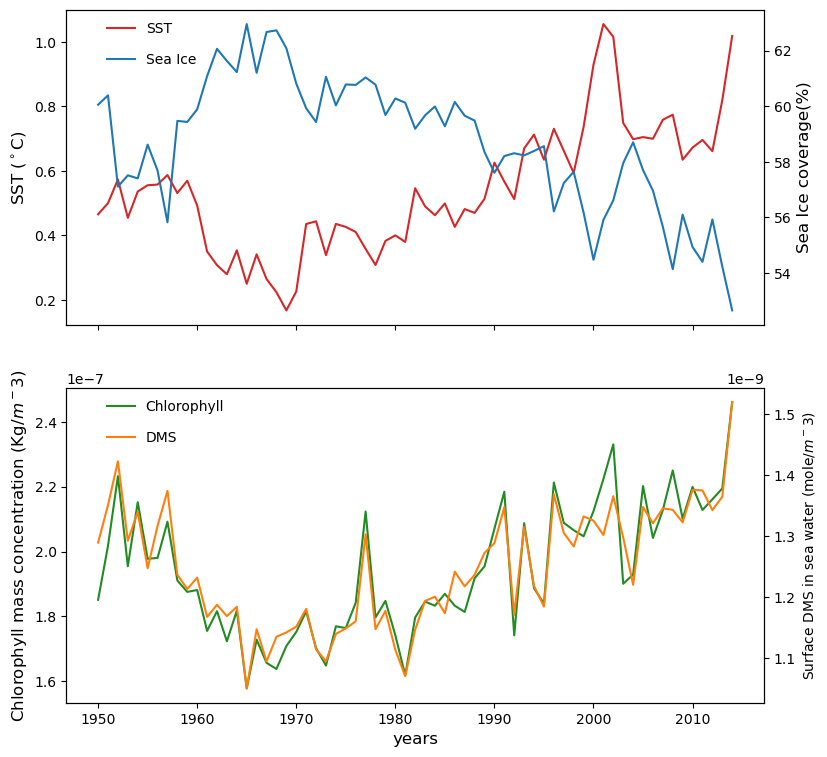

In [53]:
##.............................plot trends for the last 'n' years.............................##

n=65
chlos= np.loadtxt('Data/timeseries/chlos.txt')
dmsos= np.loadtxt('Data/timeseries/dmsos.txt')
siconc= np.loadtxt('Data/timeseries/siconc.txt')
tos= np.loadtxt('Data/timeseries/tos.txt')

fig,(ax1,ax2)=plt.subplots(2,sharex=True, figsize=(9, 9))

ax1.plot(tos[0][-n:],tos[1][-n:],label='SST',color='tab:red')
ax11=ax1.twinx()
ax11.plot(siconc[0][-n:],siconc[1][-n:],label='Sea Ice',color='tab:blue')
ax1.set_ylabel('SST ($^\circ$C)',fontsize=12)
ax11.set_ylabel('Sea Ice coverage(%)',fontsize=12)



ax2.plot(chlos[0][-n:],chlos[1][-n:],label='Chlorophyll',color='forestgreen')
ax22=ax2.twinx()
ax22.plot(dmsos[0][-n:],dmsos[1][-n:],label='DMS',color='tab:orange')
ax2.set_ylabel('Chlorophyll mass concentration (Kg/$m^-3$)',fontsize=12)
ax22.set_ylabel('Surface DMS in sea water (mole/$m^-3$)')
ax2.set_xlabel('years',fontsize=12)

ax1.legend(loc=(0.05,0.9),frameon=False)
ax11.legend(loc=(0.05,0.8),frameon=False)
ax2.legend(loc=(0.05,0.9),frameon=False)
ax22.legend(loc=(0.05,0.8),frameon=False)

## Anomalies

# Spring summer and autumn for Chlorophyll

In [56]:
ds_now=md.anomaly_seasonal('chlos')[0]
ds_ref=md.anomaly_seasonal('chlos')[1]
anm=ds_now-ds_ref

In [57]:
anm_spring=anm

In [9]:
anm.chlos.values.max()

nan

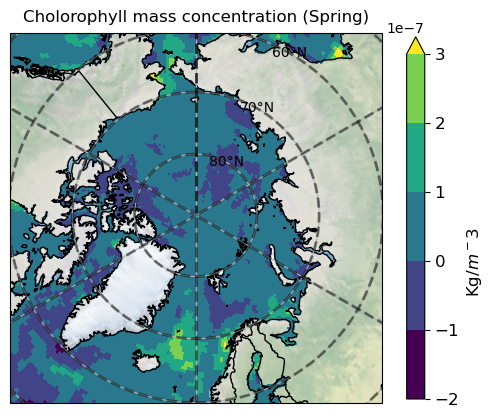

In [71]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=anm.chlos.sel(season='MAM').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(), cmap='viridis',levels = np.linspace(-2e-7,3e-7,6),add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('Kg/$m^-3$',horizontalalignment='right',fontsize=12)

ax1.set_title('Cholorophyll mass concentration (Spring)',pad=8,fontsize=12)

plt.savefig('plots/anomaly/chlos/spring.png',dpi=500)

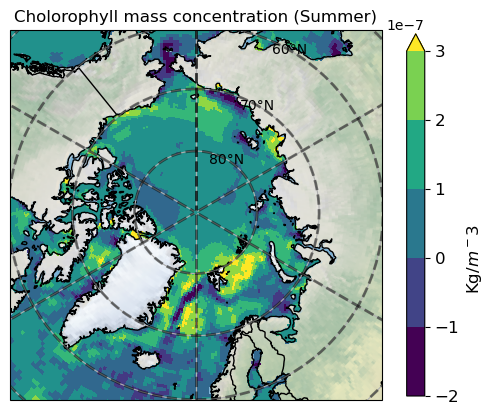

In [72]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
anm.chlos.sel(season='JJA').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(), cmap='viridis',levels = np.linspace(-2e-7,3e-7,6),add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('Kg/$m^-3$',horizontalalignment='right',fontsize=12)

ax1.set_title('Cholorophyll mass concentration (Summer)')

plt.savefig('plots/anomaly/chlos/Summer.png',dpi=500)

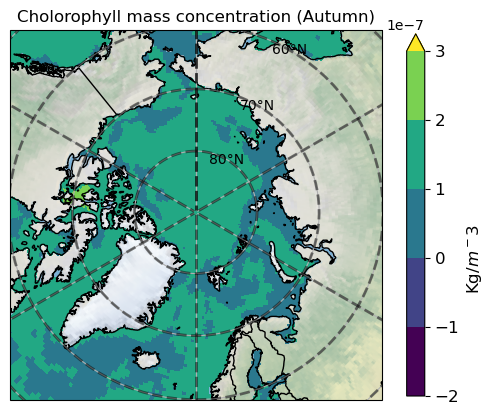

In [73]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

anm.chlos.sel(season='SON').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(), cmap='viridis',levels = np.linspace(-2e-7,3e-7,6),add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('Kg/$m^-3$',horizontalalignment='right',fontsize=12)

ax1.set_title('Cholorophyll mass concentration (Autumn)')
plt.savefig('plots/anomaly/chlos/Autumn.png',dpi=500)

## DMS

In [75]:
ds_now=md.anomaly_seasonal('dmsos')[0]
ds_ref=md.anomaly_seasonal('dmsos')[1]


In [76]:
anm1=ds_now-ds_ref

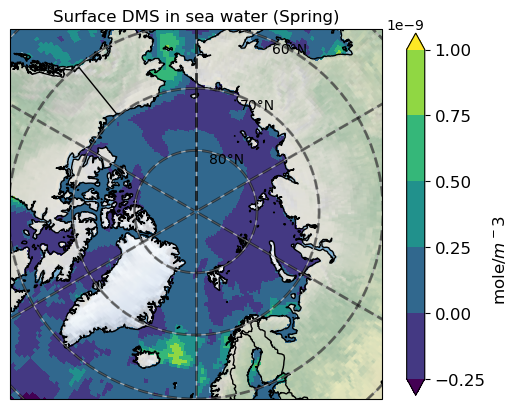

In [79]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=anm1.dmsos.sel(season='MAM').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(), cmap='viridis',add_colorbar=False,levels = np.linspace(-0.25e-9,1e-9,6))

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('mole/$m^-3$',horizontalalignment='right',fontsize=12)

ax1.set_title('Surface DMS in sea water (Spring)')

plt.savefig('plots/anomaly/DMS/spring.png',dpi=500)

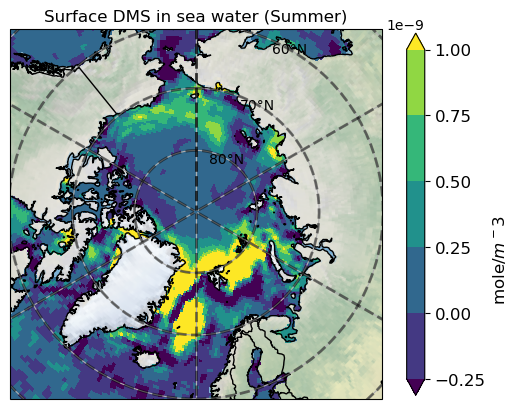

In [81]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=anm1.dmsos.sel(season='JJA').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(), cmap='viridis',add_colorbar=False,
                                     levels = np.linspace(-0.25e-9,1e-9,6))

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('mole/$m^-3$',horizontalalignment='right',fontsize=12)

ax1.set_title('Surface DMS in sea water (Summer)')

plt.savefig('plots/anomaly/DMS/summer.png',dpi=500)

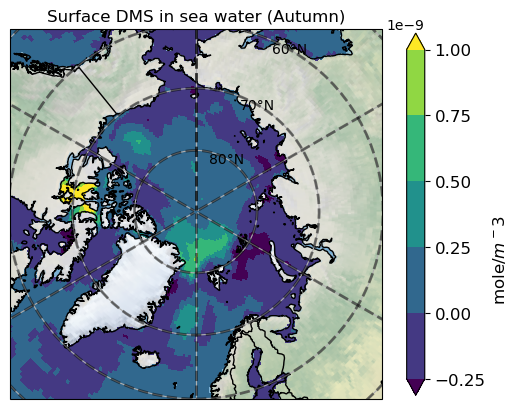

In [83]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=anm1.dmsos.sel(season='SON').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(), cmap='viridis',levels = np.linspace(-0.25e-9,1e-9,6),add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('mole/$m^-3$',horizontalalignment='right',fontsize=12)

ax1.set_title('Surface DMS in sea water (Autumn)')

plt.savefig('plots/anomaly/DMS/autumn.png',dpi=500)

## Sea ICe

In [84]:
ds=md.check_data(16,'siconc')
ds

<xarray.Dataset>
Dimensions:             (time: 60, bnds: 2, j: 384, i: 360, vertices: 4)
Coordinates:
  * time                (time) object 2010-01-16 12:00:00 ... 2014-12-16 12:0...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 378 379 380 381 382 383 384
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
    type                |S7 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(60, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(384, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(384, 360, 4), meta=np.ndarray>
    siconc              (time, j, i) float32 dask.array<chunksize=(60, 384, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1600-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     430335.0
    ...                        ...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               siconc
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/6cf248d4-c5bf-472a-bcd0-1de19001313e

In [106]:
ds_now=md.anomaly_seasonal('siconc')[0]
ds_ref=md.anomaly_seasonal('siconc')[1]

In [109]:
anm2=ds_now-ds_ref
#anm2

<bound method Dataset.dropna of <xarray.Dataset>
Dimensions:    (j: 384, i: 360, season: 4)
Coordinates:
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
    longitude  (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
    latitude   (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    siconc     (season, j, i) float64 dask.array<chunksize=(1, 384, 360), meta=np.ndarray>>

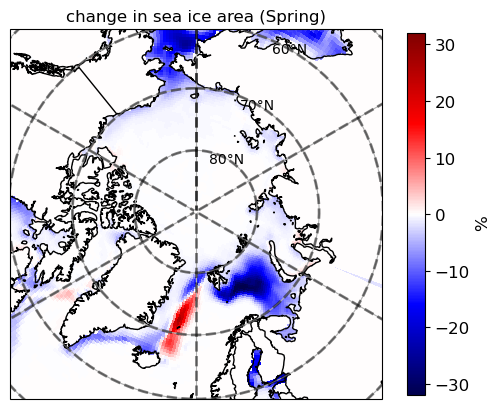

In [102]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=anm2.siconc.sel(season='MAM').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(),vmin=-32, vmax=32, cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('%',horizontalalignment='right',fontsize=12)

ax1.set_title('change in sea ice area (Spring)')

plt.savefig('plots/anomaly/sea_ice/spring.png',dpi=500)

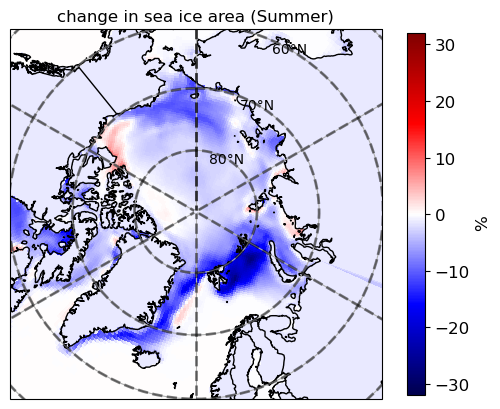

In [104]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=anm2.siconc.sel(season='JJA').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree() ,vmin=-32, vmax=32,cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('%',horizontalalignment='right',fontsize=12)

ax1.set_title('change in sea ice area (Summer)')

plt.savefig('plots/anomaly/sea_ice/summer.png',dpi=500)

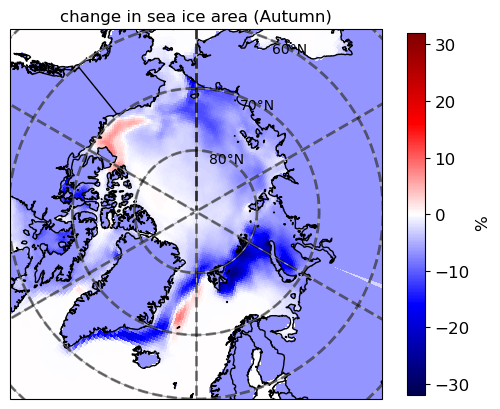

In [105]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=anm2.siconc.sel(season='SON').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(),vmin=-32, vmax=32,cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('%',horizontalalignment='right',fontsize=12)

ax1.set_title('change in sea ice area (Autumn)')

plt.savefig('plots/anomaly/sea_ice/Autumn.png',dpi=500)

## SST

In [94]:
dst_now=md.anomaly_seasonal('tos')[0]
dst_ref=md.anomaly_seasonal('tos')[1]

In [95]:
anm3=dst_now-dst_ref
anm3

<xarray.Dataset>
Dimensions:    (j: 385, i: 360, season: 4)
Coordinates:
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 378 379 380 381 382 383 384 385
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
    longitude  (j, i) float64 250.5 251.5 252.5 253.5 ... 250.1 250.1 250.0
    latitude   (j, i) float64 -80.11 -80.11 -80.11 -80.11 ... 62.59 62.35 62.11
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    tos        (season, j, i) float64 dask.array<chunksize=(1, 385, 360), meta=np.ndarray>

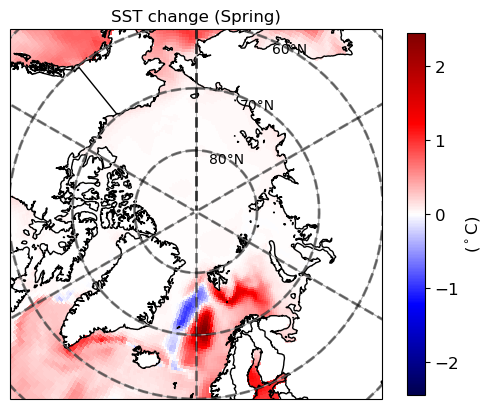

In [111]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
#ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=anm3.tos.sel(season='MAM').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('($^\circ$C)',horizontalalignment='right',fontsize=12)

ax1.set_title('SST change (Spring)')

plt.savefig('plots/anomaly/SST/Spring.png',dpi=500)

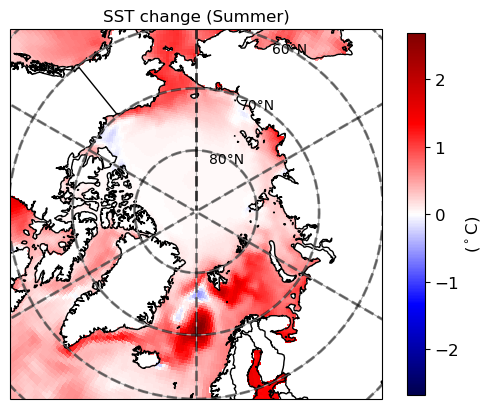

In [112]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
#ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=anm3.tos.sel(season='JJA').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('($^\circ$C)',horizontalalignment='right',fontsize=12)

ax1.set_title('SST change (Summer)')

plt.savefig('plots/anomaly/SST/Summer.png',dpi=500)

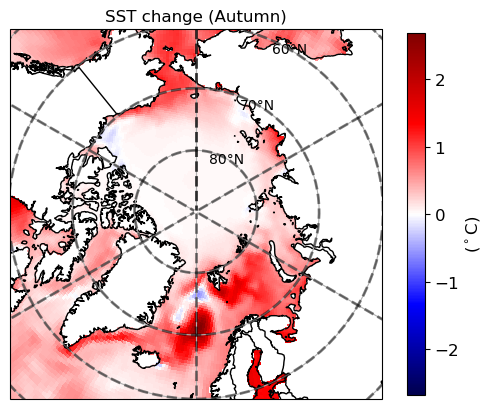

In [113]:
fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())

ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
#ax1.stock_img()
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=anm3.tos.sel(season='JJA').plot(ax=ax1,x='longitude',y='latitude'
                                   ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)

cb.set_label('($^\circ$C)',horizontalalignment='right',fontsize=12)

ax1.set_title('SST change (Autumn)')

plt.savefig('plots/anomaly/SST/Autumn.png',dpi=500)

## Trends

## Chlorophyll

In [3]:
ds_ls=md.seasonal_avg_timeseries('chlos')


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


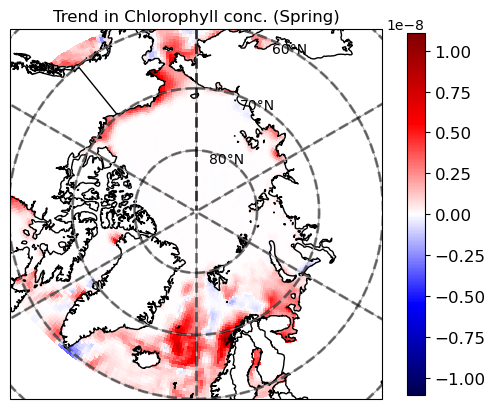

In [33]:
ds=ds_ls[1].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

levels=[-1*1e-8,0.5*1e-8,0,0.5*1e-8,1.0*1e-8]
cs=da2.chlos_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                          x='longitude', y='latitude',cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('sl',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in Chlorophyll conc. (Spring)')

plt.savefig('plots/Trend/chlos/Spring.png',dpi=500)



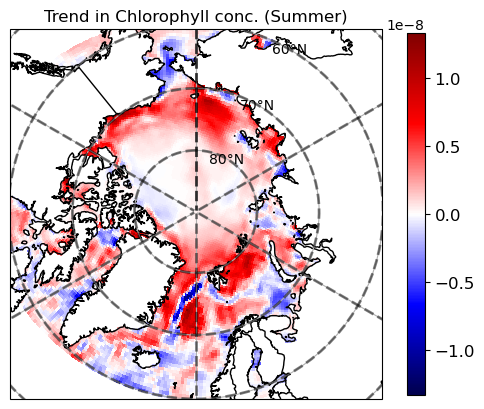

In [32]:
ds=ds_ls[2].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=da2.chlos_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), x='longitude', y='latitude',cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('slope',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in Chlorophyll conc. (Summer)')

plt.savefig('plots/Trend/chlos/Summer.png',dpi=500)

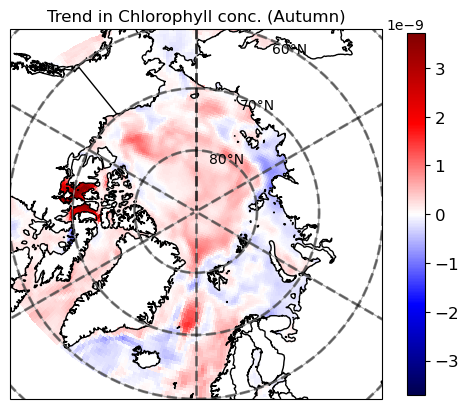

In [31]:
ds=ds_ls[3].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
levels=[-1*1e-8,0.5*1e-8,0,0.5*1e-8,1.0*1e-8]
cs=da2.chlos_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), x='longitude', y='latitude',cmap='seismic',
                                          add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('slope',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in Chlorophyll conc. (Autumn)')

plt.savefig('plots/Trend/chlos/Autumn.png',dpi=500)

## DMS

In [36]:
ds_ls=md.seasonal_avg_timeseries('dmsos')


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [37]:
ds=ds_ls[1].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)
da
#da1=da.assign_coords(latitude=ds.latitude)
#da2=da1.assign_coords(longitude=ds.longitude)

<xarray.Dataset>
Dimensions:                                  (j: 76, i: 360, vertices: 4,
                                              degree: 2)
Coordinates:
  * j                                        (j) int64 310 311 312 ... 384 385
  * i                                        (i) int64 1 2 3 4 ... 358 359 360
  * vertices                                 (vertices) int64 0 1 2 3
  * degree                                   (degree) int64 1 0
Data variables:
    vertices_latitude_polyfit_coefficients   (degree, j, i, vertices) float64 dask.array<chunksize=(2, 76, 360, 4), meta=np.ndarray>
    vertices_longitude_polyfit_coefficients  (degree, j, i, vertices) float64 dask.array<chunksize=(2, 76, 360, 4), meta=np.ndarray>
    dmsos_polyfit_coefficients               (degree, j, i) float64 dask.array<chunksize=(2, 76, 360), meta=np.ndarray>

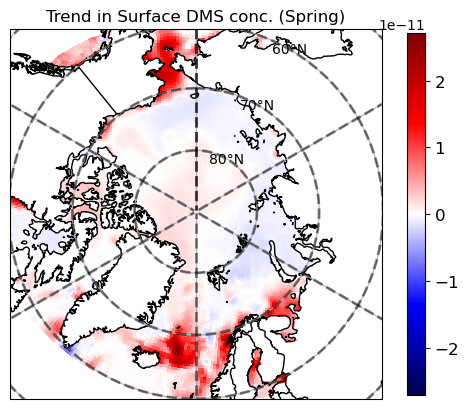

In [38]:
ds=ds_ls[1].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=da2.dmsos_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                          x='longitude', y='latitude',cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('sl',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in Surface DMS conc. (Spring)')

plt.savefig('plots/Trend/DMS/Spring.png',dpi=500)

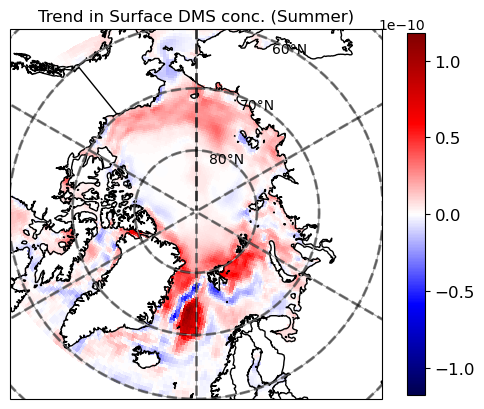

In [39]:
ds=ds_ls[2].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=da2.dmsos_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                          x='longitude', y='latitude',cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('sl',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in Surface DMS conc. (Summer)')

plt.savefig('plots/Trend/DMS/Summer.png',dpi=500)

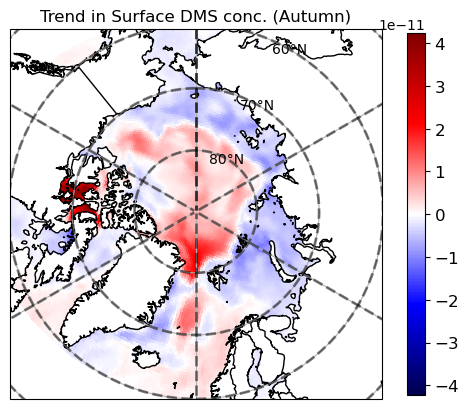

In [40]:
ds=ds_ls[3].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=da2.dmsos_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                          x='longitude', y='latitude',cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('sl',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in Surface DMS conc. (Autumn)')

plt.savefig('plots/Trend/DMS/Autumn.png',dpi=500)

## Sea ice

In [8]:
ds_ls=md.seasonal_avg_timeseries('siconc')

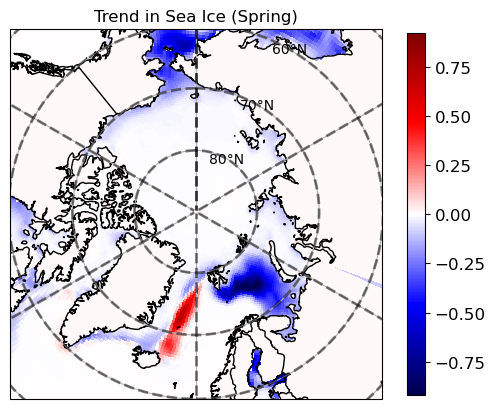

In [9]:
ds=ds_ls[1].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=da2.siconc_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                          x='longitude', y='latitude',cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('sl',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in Sea Ice (Spring)')

plt.savefig('plots/Trend/sea_ice/Spring.png',dpi=500)

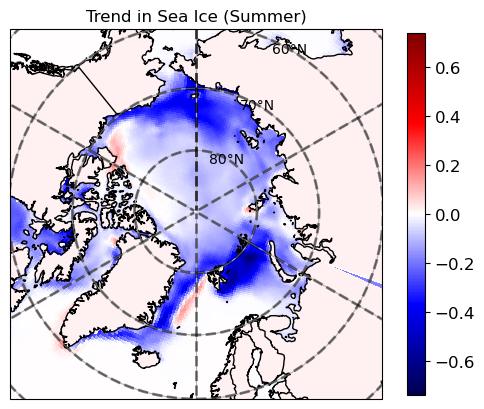

In [4]:
ds=ds_ls[2].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=da2.siconc_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                          x='longitude', y='latitude',cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('sl',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in Sea Ice (Summer)')

plt.savefig('plots/Trend/sea_ice/Summer.png',dpi=500)

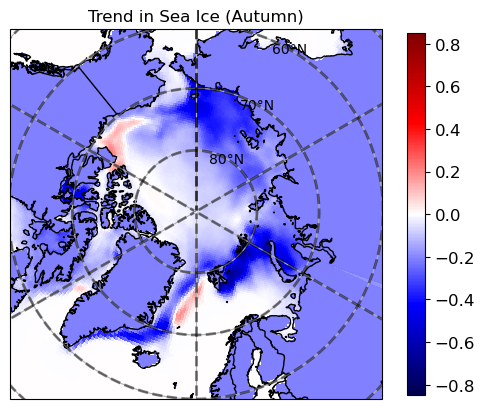

In [5]:
ds=ds_ls[3].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()

cs=da2.siconc_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                          x='longitude', y='latitude',cmap='seismic',add_colorbar=False)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('sl',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in Sea Ice (Autumn)')

plt.savefig('plots/Trend/sea_ice/Autumn.png',dpi=500)

## SST

In [12]:
ds_ls=md.seasonal_avg_timeseries('tos')


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


array([-8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
       -2.22044605e-16,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01,  6.00000000e-01,  7.00000000e-01])

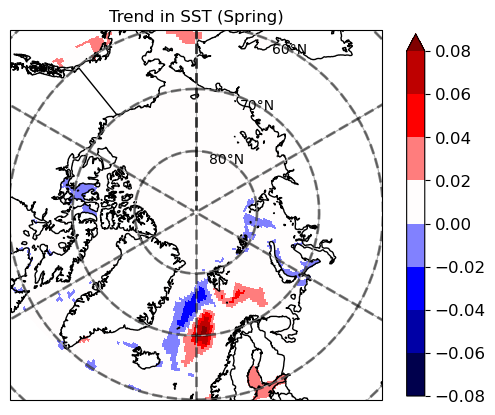

In [28]:
ds=ds_ls[1].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
levels=[-0.08,-0.06,-0.04,-0.02,-0.00,0.02,0.04,0.06,0.08]
cs=da2.tos_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                          x='longitude', y='latitude',cmap='seismic',add_colorbar=False,levels=levels)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('sl',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in SST (Spring)')

plt.savefig('plots/Trend/SST/Spring.png',dpi=500)

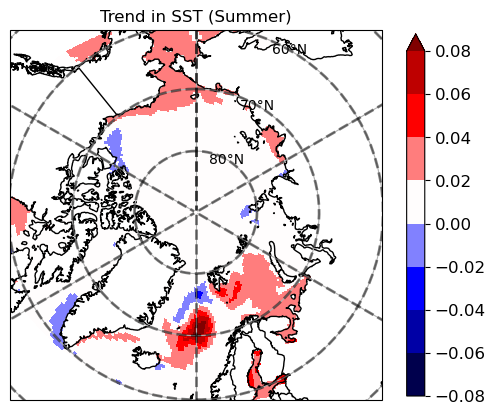

In [29]:
ds=ds_ls[2].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
levels=[-0.08,-0.06,-0.04,-0.02,-0.00,0.02,0.04,0.06,0.08]
cs=da2.tos_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                          x='longitude', y='latitude',cmap='seismic',add_colorbar=False,levels=levels)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('sl',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in SST (Summer)')

plt.savefig('plots/Trend/SST/Summer.png',dpi=500)

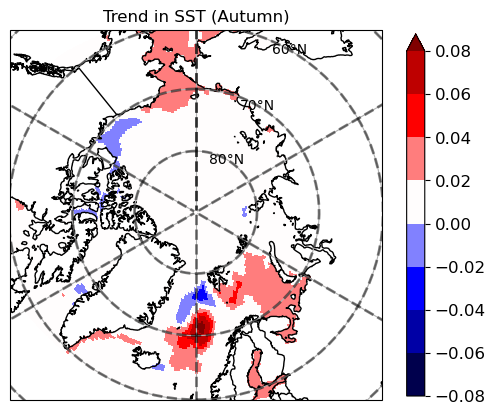

In [30]:
ds=ds_ls[3].sel(time=slice("1950-01-01", "2014-10-31"))
dss=ds.assign_coords(time=np.arange(1950,1950+len(ds.time.values)))
da=dss.polyfit('time',deg=1)

da1=da.assign_coords(latitude=ds.latitude)
da2=da1.assign_coords(longitude=ds.longitude)

fig=plt.figure()
ax1=fig.add_subplot(projection=ccrs.NorthPolarStereo())#NearsidePerspective())
ax1.set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.gridlines()
levels=[-0.08,-0.06,-0.04,-0.02,-0.00,0.02,0.04,0.06,0.08]
cs=da2.tos_polyfit_coefficients[0].plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                          x='longitude', y='latitude',cmap='seismic',add_colorbar=False,levels=levels)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom= False

cb = plt.colorbar(cs, shrink=0.98)
cb.ax.tick_params(labelsize=12)
#cb.set_label('sl',horizontalalignment='right',fontsize=12)

ax1.set_title('Trend in SST (Autumn)')

plt.savefig('plots/Trend/SST/Autumn.png',dpi=500)

In [1]:
levels=[-0.08,-0.06,-0.04,-0.02,-0.00,0.02,0.04,0.06,0.08]

## Relative or absolute trends???

In [33]:
siconc=md.check_data(16,'siconc')
siconc


<xarray.Dataset>
Dimensions:             (time: 60, bnds: 2, j: 384, i: 360, vertices: 4)
Coordinates:
  * time                (time) object 2010-01-16 12:00:00 ... 2014-12-16 12:0...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 378 379 380 381 382 383 384
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(384, 360), meta=np.ndarray>
    type                |S7 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(60, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(384, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(384, 360, 4), meta=np.ndarray>
    siconc              (time, j, i) float32 dask.array<chunksize=(60, 384, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1600-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     430335.0
    ...                        ...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               siconc
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/6cf248d4-c5bf-472a-bcd0-1de19001313e